In [3]:
import os 
import trimesh
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import glob





Found 738 files
318+310+55+55= 738
Initial Max radius: max 197.70519230452302 min 70.00190125332728 mean 123.3863646012239
Final Max radius: max 1.0000000000000002 min 0.9999999999999998 mean 1.0


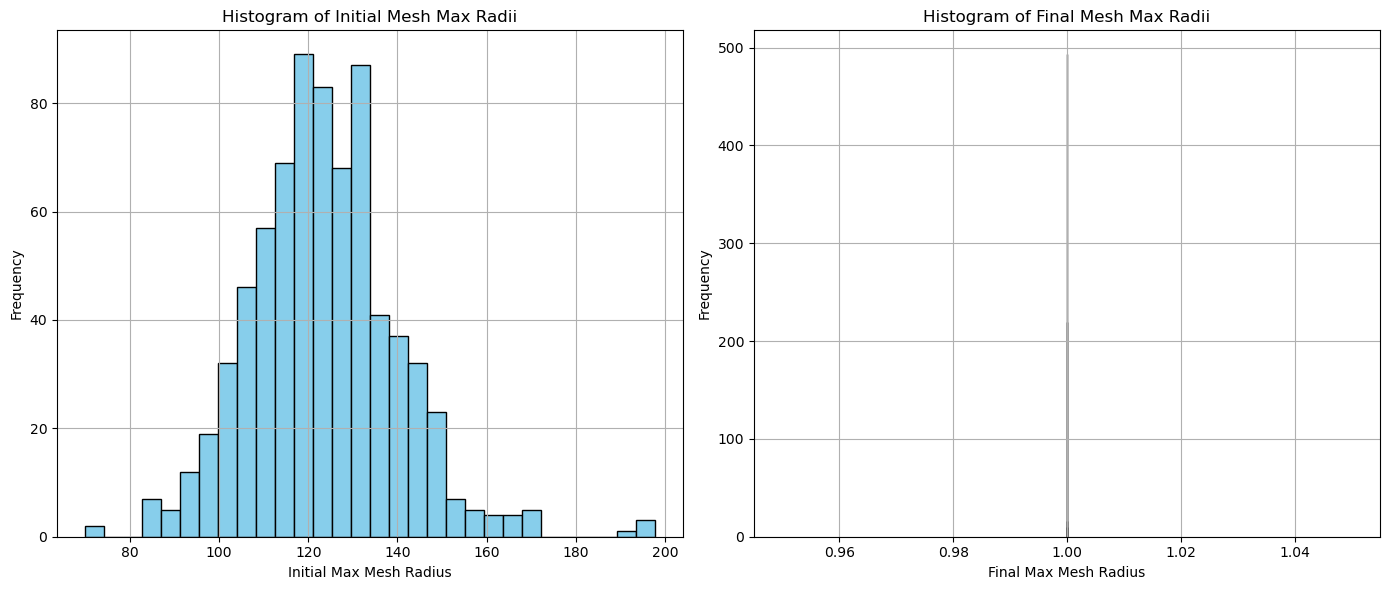

In [16]:
path = '/home/ralbe/DALS/mesh_autodecoder/data/my_new_meshes/*/T*_masks/GT/*.obj'

files = glob.glob(path)
print('Found', len(files), 'files')
print('318+310+55+55=', 318+310+55+55)

initial_radii = []
final_radii = []

for file in files:
    mesh = trimesh.load(file)
    vertices = mesh.vertices

    # Compute and save initial max radius (before normalization)
    centroid = vertices.mean(axis=0)
    centered_vertices = vertices - centroid
    init_max_radius = np.max(np.linalg.norm(centered_vertices, axis=1))
    initial_radii.append(init_max_radius)

    # Normalize vertices by dividing by max radius
    if init_max_radius > 0:
        normed_vertices = centered_vertices / init_max_radius
    else:
        normed_vertices = centered_vertices  # edge case

    # Compute and save final max radius (after normalization)
    final_max_radius = np.max(np.linalg.norm(normed_vertices, axis=1))
    final_radii.append(final_max_radius)

    # Create new mesh
    normalized_mesh = trimesh.Trimesh(vertices=normed_vertices, faces=mesh.faces, process=False)

    # Replace 'my_new_meshes' with 'vertex_clustering' in output path
    out_file = file.replace('my_new_meshes', 'vertex_clustering')
    out_dir = os.path.dirname(out_file)
    os.makedirs(out_dir, exist_ok=True)
    normalized_mesh.export(out_file)

initial_radii = np.array(initial_radii)
final_radii = np.array(final_radii)

print('Initial Max radius: max', np.max(initial_radii), 'min', np.min(initial_radii), 'mean', np.mean(initial_radii))
print('Final Max radius: max', np.max(final_radii), 'min', np.min(final_radii), 'mean', np.mean(final_radii))

plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.hist(initial_radii, bins=30, color='skyblue', edgecolor='k')
plt.xlabel('Initial Max Mesh Radius')
plt.ylabel('Frequency')
plt.title('Histogram of Initial Mesh Max Radii')
plt.grid(True)

plt.subplot(1,2,2)
plt.hist(final_radii, bins=30, color='salmon', edgecolor='k')
plt.xlabel('Final Max Mesh Radius')
plt.ylabel('Frequency')
plt.title('Histogram of Final Mesh Max Radii')
plt.grid(True)

plt.tight_layout()
plt.show()
